In [1]:
#importing the necessary libraries for processing

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random
random.seed(2)

In [8]:
#setting up the training and test data directory

train_data_dir = r'/Users/Downloads/Btech Project-Hand Gesture Recognition/Dataset/Training'
validation_data_dir = r'/Users/Downloads/Btech Project-Hand Gesture Recognition/Dataset/Test'

/var/folders/nk/t8zg_yls1rxfbpwqwxvcbpg00000gn/T/ipykernel_5044/2010569795.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, n)


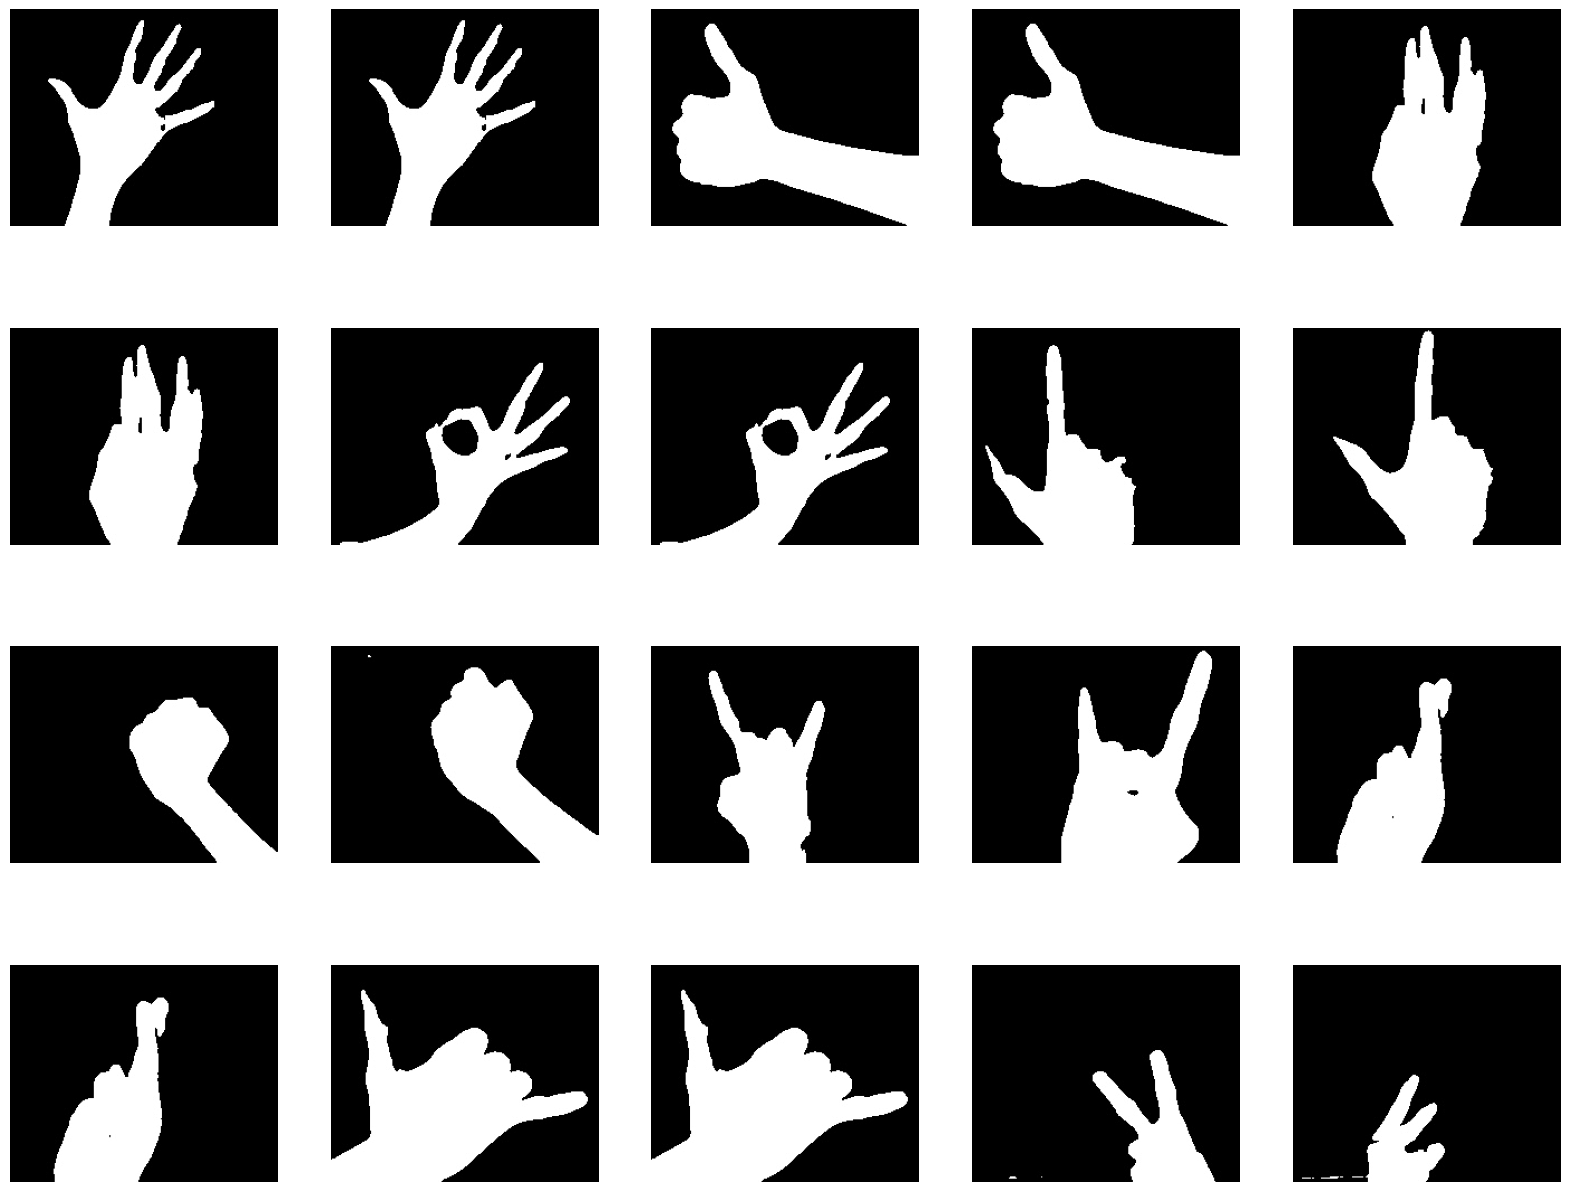

In [9]:
#show random images from train folder

import random
from PIL import Image
import os
import matplotlib.pyplot as plt

path = os.getcwd()+'/'+'Dataset/Training'
dirs = os.listdir(path)
image_random_number = 2
plt.figure(1, figsize=(20, 20))
plt.axis('off')
n = 0
for folder in os.listdir(path):
    image_lists = os.listdir(path+'/'+folder)
    for i in range(image_random_number):
        n += 1
        index = random.randint(1,image_random_number)
        image = image_lists[index]
        img = os.path.join(path,folder,image)
        im = Image.open(img)
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.imshow(im,cmap='gray')
plt.show()

In [10]:
num_classes = 10 # number of classes of the dataset contains images of 10 different hand gestures
img_rows, img_cols = 50, 50 # define the image size 50x50
batch_size = 16 #define batch size

In [ ]:
#  data augmentaiton 
#Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data

#creating a data generator
train_datagen = ImageDataGenerator(
      rescale=1./255, # normalize the image to 0-1 range
      rotation_range=30, #rotate image upto 30 degree to rotated image
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

In [12]:
#define the Custom CNN model
model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3))) #filter size 3x3 and num of filters 32
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #add maxpooling layer of size 2x2 to reduce the feature map size
model.add(Dropout(0.25)) #drop 25% of neuron randomly 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes)) #define output layer which has same number of node as number of classes 
model.add(Activation('softmax')) #softmax activation function to generate output

#print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                        

In [13]:

from keras.optimizers import RMSprop #import optimizer
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_1.h5", #save best model weight 
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


# We use a very small learning rate of 0.001
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001), 
              metrics = ['accuracy'])

#set number of train and test sample as we have 3696 images in train folder
#and 1547 images for test

nb_train_samples = 3696 
nb_validation_samples = 1547

#set epoches for the network
epochs = 5

#fit the model using dataaset

history_CNN = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/5


/Users/mcpl-l194/anaconda3/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/var/folders/nk/t8zg_yls1rxfbpwqwxvcbpg00000gn/T/ipykernel_5044/1908029646.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_CNN = model.fit_generator(
2023-10-25 13:00:51.407800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-25 13:00:51.439511: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


230/231 [============================>.] - ETA: 0s - loss: 1.8775 - accuracy: 0.3114

2023-10-25 13:01:01.063649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 1.31942, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_1.h5
231/231 [==============================] - 11s 45ms/step - loss: 1.8746 - accuracy: 0.3125 - val_loss: 1.3194 - val_accuracy: 0.5326 - lr: 0.0010
Epoch 2/5
231/231 [==============================] - ETA: 0s - loss: 1.2220 - accuracy: 0.5593
Epoch 2: val_loss improved from 1.31942 to 0.50303, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_1.h5
231/231 [==============================] - 10s 45ms/step - loss: 1.2220 - accuracy: 0.5593 - val_loss: 0.5030 - val_accuracy: 0.8223 - lr: 0.0010
Epoch 3/5
230/231 [============================>.] - ETA: 0s - loss: 0.8666 - accuracy: 0.6908
Epoch 3: val_loss improved from 0.50303 to 0.35026, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_1.h5
231/231 [=====

In [14]:
#classification report for Custom CNN



from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred_CNN = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred_CNN = np.argmax(Y_pred_CNN, axis=1)
print('\n----------------Confusion Matrix-----------------\n')
print(confusion_matrix(validation_generator.classes, y_pred_CNN))
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
#class_names = list(class_labels.values())
target_names = list(class_labels.values())
print('\n------------- Classification report: Custom CNN --------------------\n')
print(classification_report(validation_generator.classes, y_pred_CNN, target_names=target_names))

/var/folders/nk/t8zg_yls1rxfbpwqwxvcbpg00000gn/T/ipykernel_5044/1887356990.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred_CNN = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
2023-10-25 13:02:31.769547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



----------------Confusion Matrix-----------------

[[167   0   0   0   0   0   0   0   0   0]
 [  0 157   0   0   2   0   0   4   0   5]
 [  0   0 144   0   0   0   0   0   0   0]
 [  0   0   2 145   1   0   0   0   0   0]
 [  0   0   0   2 158   0   0   1   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 153   1   0   5]
 [  0   0  15   1   1   0   0 117   0  14]
 [  4   3   0   0   0   0   0   0 161   3]
 [  0   0   0   1   0   0   0   2   3 139]]

------------- Classification report: Custom CNN --------------------

                 precision    recall  f1-score   support

        call_me       0.98      1.00      0.99       167
fingers_crossed       0.98      0.93      0.96       168
           okay       0.89      1.00      0.94       144
          paper       0.97      0.98      0.98       148
          peace       0.98      0.98      0.98       161
           rock       1.00      1.00      1.00       136
        rock_on       1.00      0.96      0.98

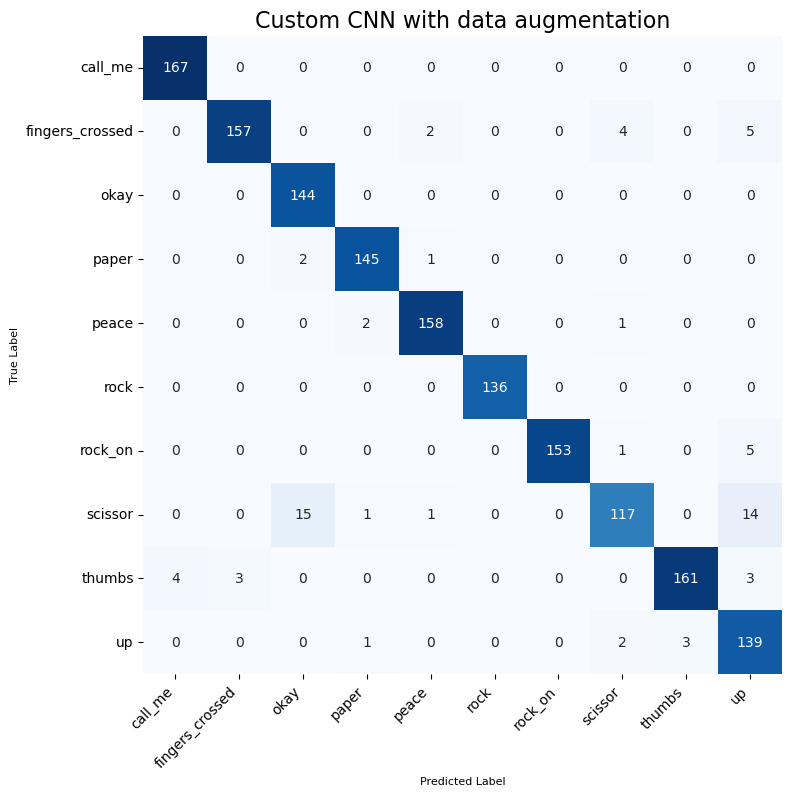

In [16]:
#show the confusion matrix graphically for custom CNN


import seaborn as sns
from sklearn.metrics import confusion_matrix


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
class_names_CNN = list(class_labels.values())

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=8)
    ax.set_xlabel('Predicted Label', fontsize=8)

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 8))

plot_heatmap(true_classes, y_pred_CNN, class_names_CNN, ax1, title="Custom CNN with data augmentation")    
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

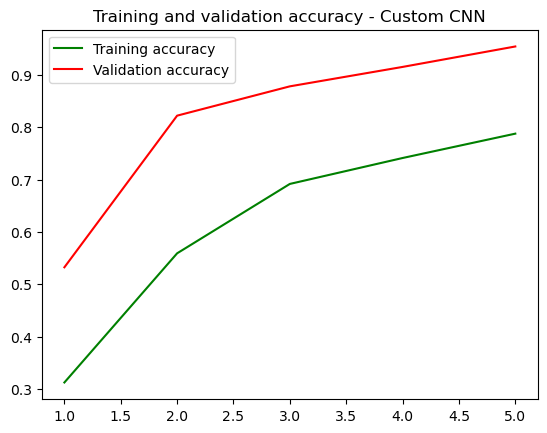

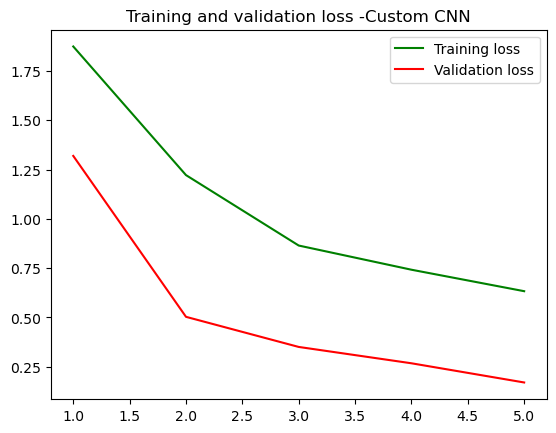

In [17]:
#plot accuracy and loss for custom CNN

import matplotlib.pyplot as plt

acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

epochs = range(1, len(acc)+1)

#plot the train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy - Custom CNN')
plt.legend()

plt.figure()

#plot the train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss -Custom CNN')
plt.legend()

plt.show()

In [18]:
import os
import re
from os import listdir
from os.path import isfile, join
import cv2

from keras.models import load_model
from keras.preprocessing import image


#this function draw the predicted and actual labels on the image 
def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

#function to select image randomly for prediction
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

In [20]:
#randomly choose image from test images and show predicted and actual lebels

import numpy as np
# dimensions of our images
img_width, img_height = 50, 50


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 5):
    path = '/Users/Downloads/Btech Project-Hand Gesture Recognition/Dataset/Test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

## VGG16 pretrained model  

In [ ]:
## Pretraind VGG16 without feature extraction

In [23]:

import keras
from keras.applications.vgg16 import VGG16
# load the pretrained VGG16 network 
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(img_rows, img_cols, 3))
model_vgg.summary()

[INFO loading network...
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

In [24]:
# Freeze all the layers except the last 3 layers
for layer in model_vgg.layers[:-3]:
    layer.trainable = False
    
# show the layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x172aa9450> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17ca16190> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c96d810> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x17df1b9d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c96ea50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c94e250> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x17cb69fd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c96d250> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c96df50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17df2a850> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x17cc56310> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x178cf62d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x178db1610> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17c940b

In [27]:
#construct the head of the model that will be placed on top of the
# the vgg16 base model

model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dense(512, activation='relu'))
model_transfer_full.add(Dropout(0.5))
model_transfer_full.add(Dense(10, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 4,987,402
Non-trainable params: 9,995,072
___________________________________

In [29]:
image_size = img_rows
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 16
val_batchsize = 16

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 3696 images belonging to 10 classes.
Found 1547 images belonging to 10 classes.


In [31]:
nb_train_samples = 3696
nb_validation_samples =1547
epochs = 5


history_vgg16 = model_transfer_full.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples //16, # batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // 16) #batch_size)
# Use pretrained VGG16 model to train without fine tuning

Epoch 1/5


2023-10-25 13:08:18.512800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


231/231 [==============================] - ETA: 0s - loss: 1.8210 - accuracy: 0.4067

2023-10-25 13:08:42.915621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 1.18727, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_vgg16.h5
231/231 [==============================] - 33s 140ms/step - loss: 1.8210 - accuracy: 0.4067 - val_loss: 1.1873 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 2/5
231/231 [==============================] - ETA: 0s - loss: 0.9170 - accuracy: 0.7635
Epoch 2: val_loss improved from 1.18727 to 0.59110, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_vgg16.h5
231/231 [==============================] - 34s 148ms/step - loss: 0.9170 - accuracy: 0.7635 - val_loss: 0.5911 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 3/5
231/231 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.8634
Epoch 3: val_loss improved from 0.59110 to 0.37662, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_vgg16.h5


In [32]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred_vgg16 = model_transfer_full.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred_vgg16 = np.argmax(Y_pred_vgg16, axis=1)
print('\n--------------Confusion Matrix----------------------\n')
print(confusion_matrix(validation_generator.classes, y_pred_vgg16))

class_labels = validation_generator.class_indices
class_labels_vgg16 = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
#class_names = list(class_labels.values())
target_names = list(class_labels_vgg16.values())
print('\n------------- Classification report: Pretrained VGG16 with data augmentation --------------------\n')
print(classification_report(validation_generator.classes, y_pred_vgg16, target_names=target_names))

2023-10-25 13:11:25.274636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



--------------Confusion Matrix----------------------

[[166   0   0   0   0   0   0   1   0   0]
 [  0 157   0   0   9   0   2   0   0   0]
 [  0   0 144   0   0   0   0   0   0   0]
 [  1   0   1 140   1   0   0   5   0   0]
 [  0   1   0   0 160   0   0   0   0   0]
 [  4   1   0   0   0 130   0   1   0   0]
 [  0   1   0   0   5   0 153   0   0   0]
 [  1   0   1   0   0   0   2 139   1   4]
 [  4   7   0   0   0   0   0   0 160   0]
 [  0   4   0   0   0   0   0   0   1 140]]

------------- Classification report: Pretrained VGG16 with data augmentation --------------------

                 precision    recall  f1-score   support

        call_me       0.94      0.99      0.97       167
fingers_crossed       0.92      0.93      0.93       168
           okay       0.99      1.00      0.99       144
          paper       1.00      0.95      0.97       148
          peace       0.91      0.99      0.95       161
           rock       1.00      0.96      0.98       136
        rock_o

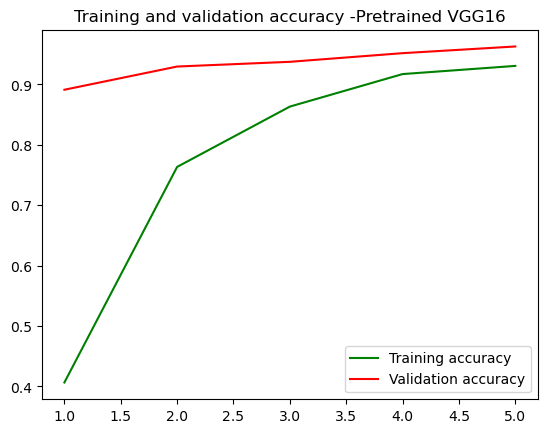

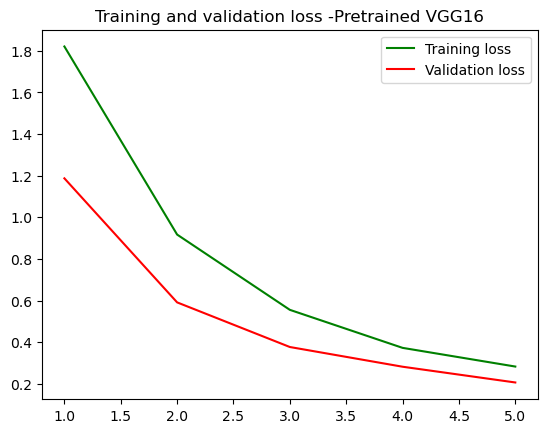

In [33]:
#plot loss and accuracy

import matplotlib.pyplot as plt

acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs = range(1, len(acc)+1)

#plot the train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy -Pretrained VGG16')
plt.legend()

plt.figure()

#plot the train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss -Pretrained VGG16')
plt.legend()

plt.show()

## VGG16 as a feature extractor

In [35]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils as image

In [35]:
# Instantiate convolutional base for use VGG16 as a feature extractor
import keras 
from keras.applications.vgg16 import VGG16 

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3)) 

In [36]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [37]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 1, 1, 512)) #this must be same as output of last laayer of VGG16
    labels = np.zeros(shape=(sample_count, 10)) 
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(img_width, img_height), 
        batch_size=batch_size, 
        class_mode='categorical')
    i=0
    print ("before for loop")
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #extract features for each images using vgg16
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [39]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D



model_new = models.Sequential()
model_new.add(layers.GlobalAveragePooling2D(input_shape=(1,1,512)))
model_new.add(Dense(1024, activation='relu')) # add first dense layer with 1024 nodes
model_new.add(Dense(512, activation='relu'))  #add second dense layer with 512 nodes
model_new.add(Dropout(0.25))
model_new.add(layers.Dense(10, activation='softmax'))
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
____________________________________________

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam


checkpoint = ModelCheckpoint("/Users/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

model_new.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

epochs = 5
# Train model
history_pre = model_new.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(test_features, test_labels))

Epoch 1/5
231/231 [==============================] - ETA: 0s - loss: 0.5305 - acc: 0.8168
Epoch 1: val_loss improved from inf to 0.23102, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_2.h5
231/231 [==============================] - 1s 4ms/step - loss: 0.5305 - acc: 0.8168 - val_loss: 0.2310 - val_acc: 0.9315
Epoch 2/5
221/231 [===========================>..] - ETA: 0s - loss: 0.1742 - acc: 0.9457
Epoch 2: val_loss did not improve from 0.23102
231/231 [==============================] - 1s 4ms/step - loss: 0.1733 - acc: 0.9456 - val_loss: 0.2677 - val_acc: 0.9231
Epoch 3/5
217/231 [===========================>..] - ETA: 0s - loss: 0.1286 - acc: 0.9548
Epoch 3: val_loss improved from 0.23102 to 0.19984, saving model to /Users/mcpl-l194/Downloads/Btech Project-Hand Gesture Recognition/Dataset/CNN/Hand_gestures_cnn_2.h5
231/231 [==============================] - 1s 4ms/step - loss: 0.1265 - acc: 0.9556 - val_loss: 0.1998 - va

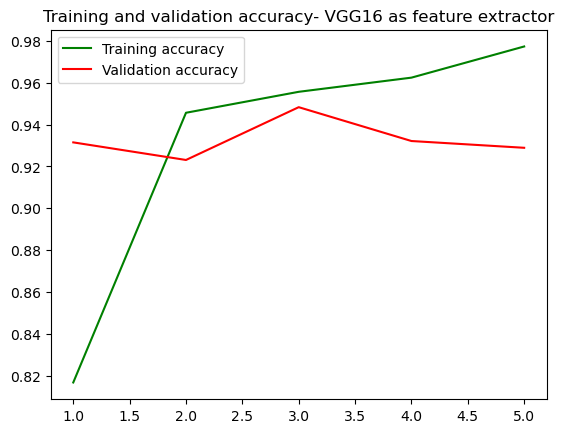

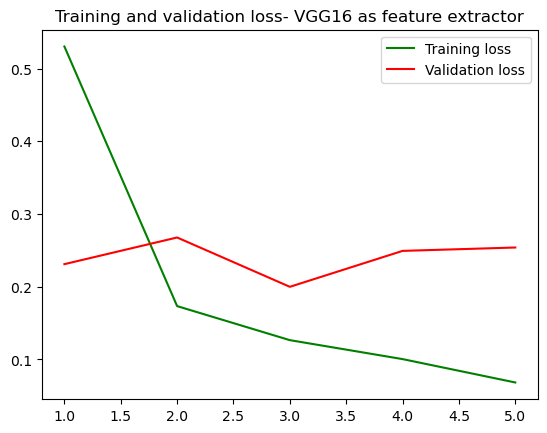

In [41]:
import matplotlib.pyplot as plt

acc = history_pre.history['acc']
val_acc = history_pre.history['val_acc']
loss = history_pre.history['loss']
val_loss = history_pre.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy- VGG16 as feature extractor')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss- VGG16 as feature extractor')
plt.legend()

plt.show()

In [44]:
vgg_preds = model_new.predict(test_features)
vgg_true_class = test_labels.argmax(1)

49/49 [==============================] - 0s 1ms/step


In [46]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Reshape the test_labels.argmax(1) to have shape (1547,)
test_labels_argmax = test_labels.argmax(1)

con_mat = confusion_matrix(test_labels_argmax, vgg_preds.argmax(axis=1))
print('Confusion matrix for VGG16 as a feature extractor')
print(con_mat)

Confusion matrix for VGG16 as a feature extractor
[[167   0   0   0   0   0   0   0   0   0]
 [  1 162   0   0   3   1   1   0   0   0]
 [  0   0 130  14   0   0   0   0   0   0]
 [  0   0   0 143   1   0   0   4   0   0]
 [  0   1   0   0 158   2   0   0   0   0]
 [  1   0   0   0   0 131   1   3   0   0]
 [  0   2   0   0   1   0 156   0   0   0]
 [ 16   0   0   4   1   0   2 125   0   0]
 [ 18   5   0   0   0   3   2   1 142   0]
 [  2   3   0   1   0   0   3  13   0 123]]


In [48]:
#classification report for VGG16 network when used as feature extractor
vgg_pred_class = model_new.predict(test_features)
vgg_true_class = test_labels.argmax(1)
print('\n---------Classification report for VGG16 as a feature extractor---------\n')
classes_out = ['call_me', 'finger_crossed', 'okay', 'paper', 'peace','rock','rock_on','scissor','thumbs','up']
print(classification_report(vgg_true_class, vgg_pred_class , target_names=classes_out))

49/49 [==============================] - 0s 1ms/step

---------Classification report for VGG16 as a feature extractor---------



ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [49]:
from sklearn.metrics import classification_report

# Assuming vgg_pred_class contains predicted probabilities or scores, and vgg_true_class is a 1D array of class labels.
# Convert predicted probabilities to class labels by taking the class with the highest probability.
vgg_pred_labels = vgg_pred_class.argmax(axis=1)

# Now you can call classification_report with the correct format.
print(classification_report(vgg_true_class, vgg_pred_labels, target_names=classes_out))

                precision    recall  f1-score   support

       call_me       0.81      1.00      0.90       167
finger_crossed       0.94      0.96      0.95       168
          okay       1.00      0.90      0.95       144
         paper       0.88      0.97      0.92       148
         peace       0.96      0.98      0.97       161
          rock       0.96      0.96      0.96       136
       rock_on       0.95      0.98      0.96       159
       scissor       0.86      0.84      0.85       148
        thumbs       1.00      0.83      0.91       171
            up       1.00      0.85      0.92       145

      accuracy                           0.93      1547
     macro avg       0.94      0.93      0.93      1547
  weighted avg       0.93      0.93      0.93      1547



## Model comparision

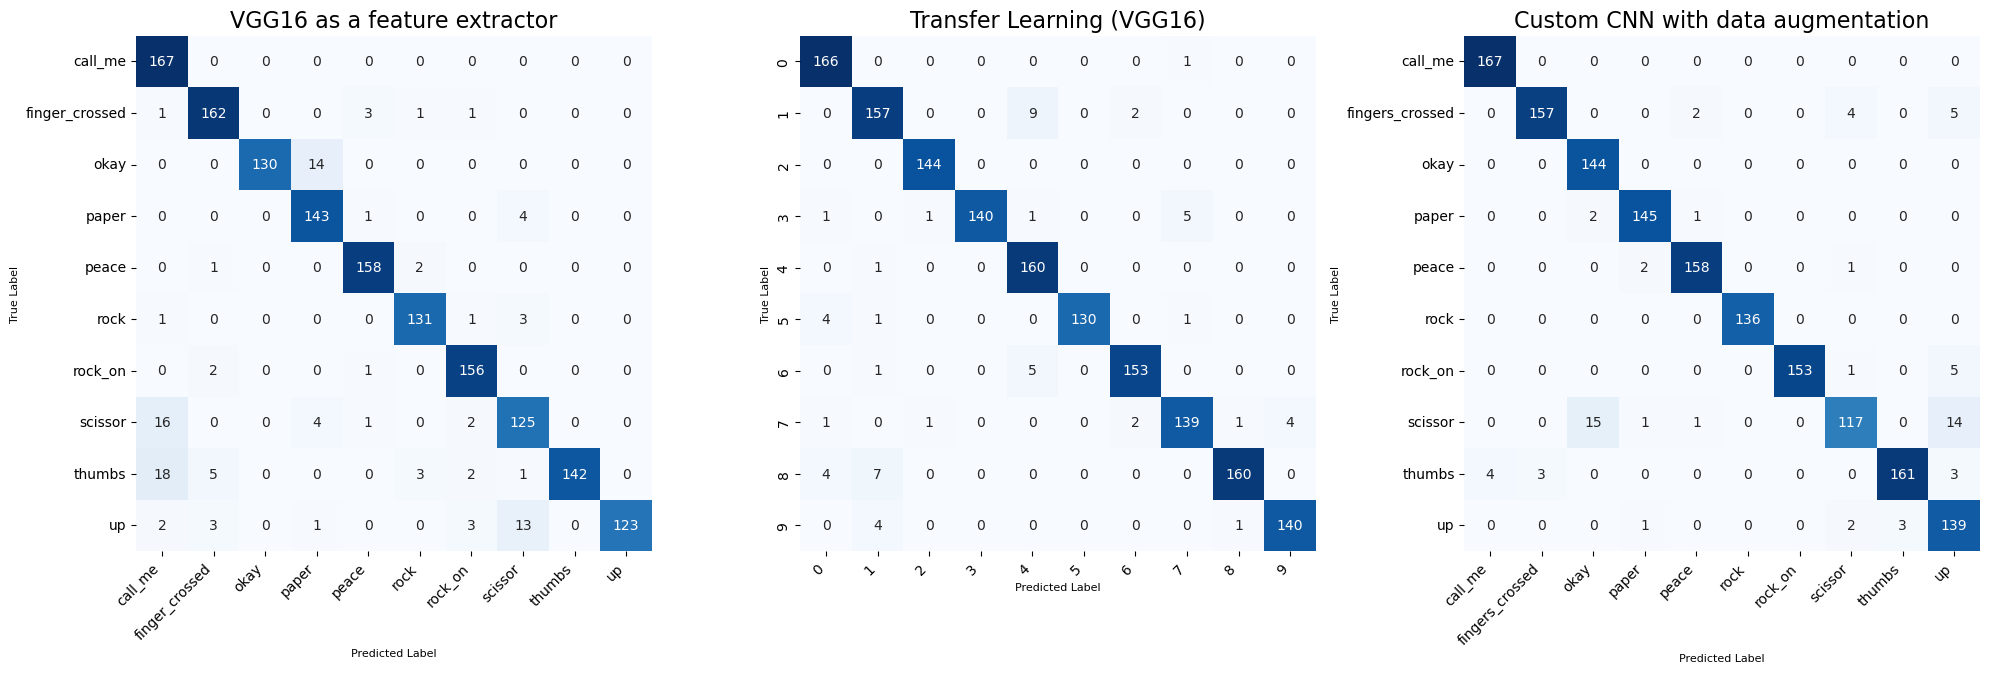

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=8)
    ax.set_xlabel('Predicted Label', fontsize=8)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Assuming vgg_pred_class contains predicted probabilities or scores, and vgg_true_class is a 1D array of class labels.
# Convert predicted probabilities to class labels by taking the class with the highest probability.
vgg_pred_labels = vgg_pred_class.argmax(axis=1)

# You should also ensure that your true classes are in the correct format, similar to the predicted class labels.

plot_heatmap(vgg_true_class, vgg_pred_labels, classes_out, ax1, title="VGG16 as a feature extractor")    
plot_heatmap(true_classes, y_pred_vgg16, class_labels_vgg16, ax2, title="Transfer Learning (VGG16)")    
plot_heatmap(true_classes, y_pred_CNN, class_names_CNN, ax3, title="Custom CNN with data augmentation")    

fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()
